# Método de residuos ponderados

## Problema a resolver

Consideremos la siguiente ecuación diferencial

$$\frac{d^2u}{dx^2} + u + x = 0 \enspace , $$

con condiciones de frontera $u(0)=u(1)=0$.

La solución a este problema de valores de la frontera es

$$u_e(x) = \frac{\sin(x)}{\sin(1)} - x \enspace ,$$

## Aproximación propuesta

Propongamos una aproximación a la solución de la siguiente forma

$$u_N(x) = \sum_{i=0}^N c_i \phi_i(x) = x (1-x) \sum_{i=0}^N c_i x^i\, ,$$

en donde vemos que esta función satisface las condiciones de frontera.

Y el residual estaría dado por

$$R = \frac{d^2 u_N}{dx^2} + u_N + x\, .$$

## Residuos ponderados

En el método de residuos ponderados se busca que el _promedio_ ponderado
del residual sea cero, es decir

$$\int\limits_\Omega R w_i \mathrm{d}\Omega = 0\quad \forall w_i\, .$$

## Funciones auxiliares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
%matplotlib notebook
init_printing()

# Configuracion graficos
gris = '#757575'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["text.color"] = gris
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.color"] = gris
plt.rcParams["ytick.color"] = gris
plt.rcParams["axes.labelcolor"] = gris
plt.rcParams["axes.edgecolor"] = gris
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [3]:
x = symbols('x')

In [4]:
u_e = sin(x)/sin(1) - x

In [5]:
def plot_expr(expr, x, rango=(0, 1), ax=None, linestyle="solid"):
    """Grafica expresiones de SymPy que dependen de una variable"""
    expr_num = lambdify(x, expr, "numpy")
    x0 = rango[0]
    x1 = rango[1]
    x_num = np.linspace(0, 1, 301)
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.plot(x_num, expr_num(x_num), linestyle=linestyle)

Creemos algunas funciones que nos serán útiles.

In [6]:
def funcion_base(x, k):
    """Elemento k de la base"""
    return x*(1 - x)*x**k


def funcion_aprox(x, num):
    """Función de aproximación
    
    Parametros
    ----------
    num : int
        Número de términos en la expansión.
        
    Devuelve
    -------_
    u_n : expresiónd de SymPy
        Función de aproximación.
    c : lista
        Lista de coeficientes.
        
    """    
    c = symbols('c0:%d'%num)
    u_n = sum([c[k]*funcion_base(x, k) for k in range(num)])
    return u_n, c


def residual(u, x):
    """Residual para el problema de interés"""
    return diff(u, x, 2) + u + x

Si usamos una función de aproximación con 2 términos tendríamos

In [7]:
nterms = 2

In [8]:
u, c = funcion_aprox(x, nterms)
u

Y el residual sería

In [9]:
res = expand(residual(u, x))
factor(res)

## Método de Galerkin

El método de Galerkin se basa en imponer que el residual sea ortogonal a cada uno
de los elementos de la base, es decir

$$\int\limits_0^1 R \phi_k\, \mathrm{d}x =0\quad \forall \phi_k\, .$$

En este caso tendríamos las siguientes ecuaciones:

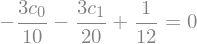

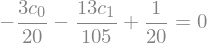

In [10]:
eqs_gale = []
for cont in range(nterms):
    eqs_gale.append(Eq(integrate(res*funcion_base(x, cont), (x, 0, 1)), 0))
    display(eqs_gale[cont])

Y podemos resolver el sistema de ecuaciones

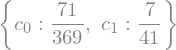

In [11]:
sol_gale = solve(eqs_gale, c)
sol_gale

In [12]:
5/18

Y la aproximación sería entonces

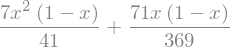

In [13]:
u.subs(sol_gale)

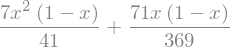

In [14]:
u.subs(sol_gale)

Comparemos las soluciones

<IPython.core.display.Javascript object>


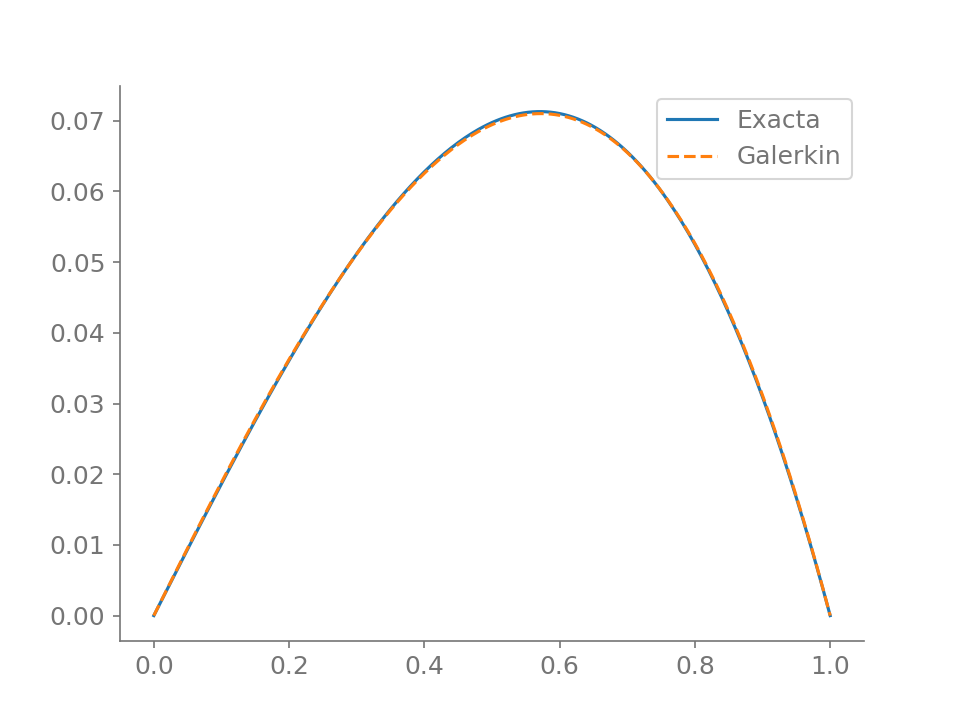

In [15]:
plt.figure()
ax = plt.gca()
plot_expr(u_e, x, ax=ax)
plot_expr(u.subs(sol_gale), x, ax=ax, linestyle="dashed")
plt.legend(["Exacta", "Galerkin"]);

## Mínimos cuadrados

El método de mínimos cuadrados consiste en minimizar el cuadrado de la norma del residual,
es decir, imponer

$$\frac{\partial}{\partial c_i} \int\limits_0^1 R^2\, \mathrm{d}x = 0\quad \forall i\, .$$

Este método puede escribirse como un residuo ponderado si se escoge como función de ponderación
la derivada parcial respecto al coeficiente i-ésimo:

$$ \int\limits_0^1 R \frac{\partial R}{\partial c_i}\, \mathrm{d}x = 0\quad \forall i\, .$$

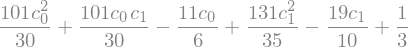

In [16]:
inte = integrate(expand(res**2), (x, 0, 1))
inte

Y en este caso las ecuaciones serían

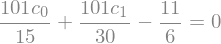

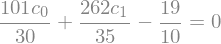

In [17]:
eqs_min = []
for cont in range(nterms):
    eqs_min.append(Eq(diff(inte, c[cont]), 0))
    display(eqs_min[cont])

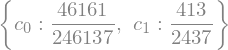

In [18]:
sol_min = solve(eqs_min, c)
sol_min

<IPython.core.display.Javascript object>


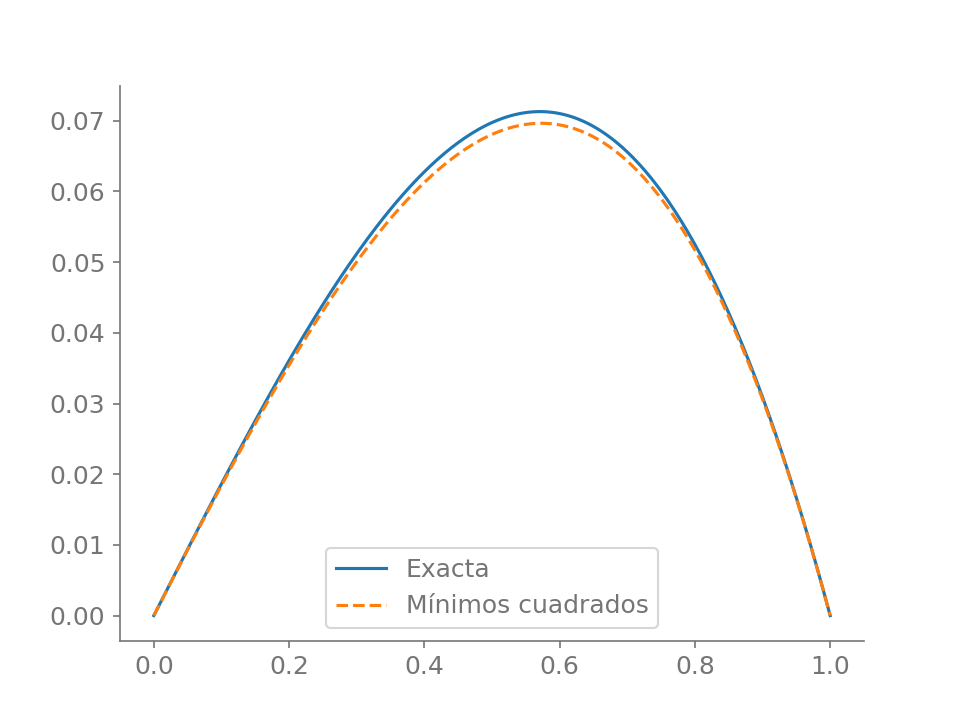

In [19]:
plt.figure()
ax = plt.gca()
plot_expr(u_e, x, ax=ax)
plot_expr(u.subs(sol_min), x, ax=ax, linestyle="dashed")
plt.legend(["Exacta", "Mínimos cuadrados"]);

## Colocación

El método de colocación consiste en forzar que el residual sea cero en un conjunto de puntos.
Este método se puede escribir como un método de residuos ponderados si se elige
como función de ponderación el delta de Dirac, es decir,

$$\int\limits_0^1 R \delta(x - x_i)\, \mathrm{d}x = 0\quad \forall x_i\, ,$$

o equivalentemente

$$R (x_i) = 0\quad \forall x_i\, .$$

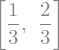

In [20]:
x_colo = [(cont + 1)*S(1)/(nterms + 1) for cont in range(nterms)]
x_colo

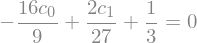

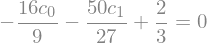

In [21]:
eqs_colo = []
for cont in range(nterms):
    eqs_colo.append(Eq(res.subs(x, x_colo[cont]), 0))
    display(eqs_colo[cont])

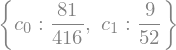

In [22]:
sol_col = solve(eqs_colo, c)
sol_col

<IPython.core.display.Javascript object>


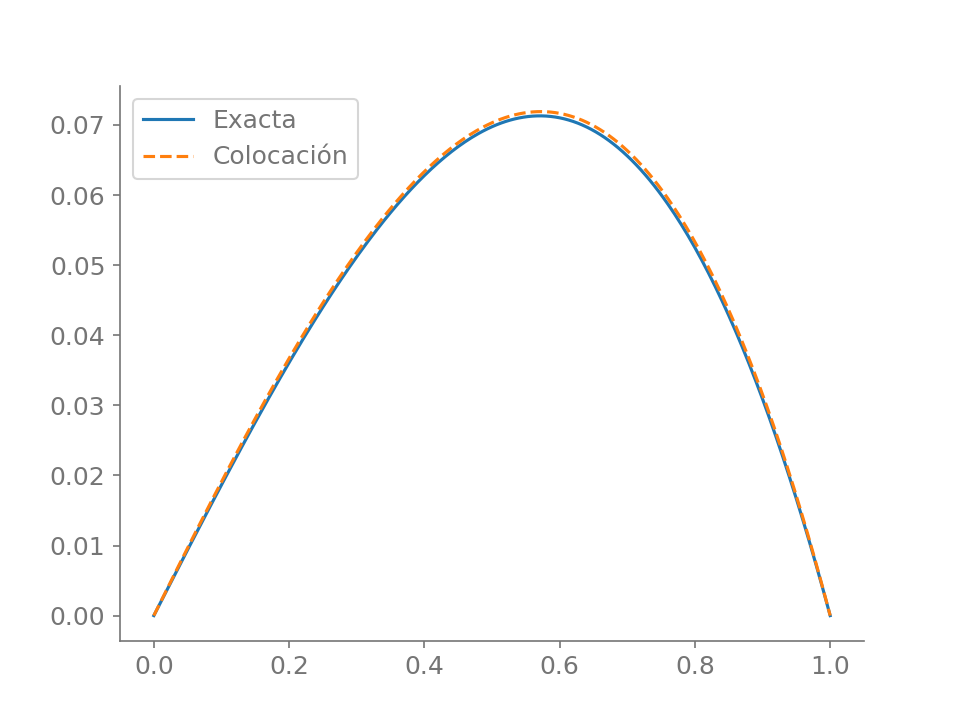

In [23]:
plt.figure()
ax = plt.gca()
plot_expr(u_e, x, ax=ax)
plot_expr(u.subs(sol_col), x, ax=ax, linestyle="dashed")
plt.legend(["Exacta", "Colocación"]);

## Ejercicio


Encuentre soluciones aproximadas para el problema

$$\frac{d^2 u}{dx^2} - \frac{d u}{dx} = - 9\pi^2 \sin(3 \pi x ) - 3 \pi \cos(3 \pi x )\, ,$$

con $u(0)=u(1)=0$. Con solución analítica

$$u_e = \sin(3\pi x)\, .$$

Compare el error para aproximaciones tomando 1, 2, y 3 términos.